<h2>Who wants a piece of Py?</h2>

<h1>WhoPy #002</h1>
<h2>More fun with the library</h2>

Na początek załadujemy kilka gotowych bibliotek python'a
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [21]:
import numpy as np  #to taka biblioteka z funkcjami numerycznymi jak tablice i inne takie tam      
import matplotlib.pyplot as plt #to biblioteka pozwalajaca nam wykreslać wykresyb

teraz czas załadować naszą własną bibliotekę<br>
importujemy i wykonujemy ten blok <b>Shift+ENTER</b>

In [22]:
#importing our own library
from thermalModelLibrary import functionsLibrary as tml

<p>czyli z naszego pakietu <i>thermalModelLibrary</i> importujemy <i>functionsLibrary</i> (taki zbiór funkcji wszelakich) jako <i>tml</i> - bo to łatwiej napisac w kodzie niźli pełną nazwę</p>
<h2>Mamy biblioteki - możemy działać</h2>
<br>
<p>Na start zdefiniujmy sobie analizowaną geometrię szyny. Powiedzmy, że coś takiego: szyna 40x10mm długości 250mm z dwoma otworami na początku i na końcu.
<img src='img/simpleCopperBar40x10.png'>
</p>
<p>Zdefiniujmy zatem opis tej geometrii w postaci macierzowej dzieląc ja na <i>segmenty</i>:</p>
<ul>
    <li>segment 40x10,10mm dłogości, bez otworu
    <li>segment 40x10,15mm długości, otwór 14mm
    <li>segment 40x10,200mm długości, bez otworu
    <li>segment 40x10,15mm długości, otwór 14mm
    <li>segment 40x10,10mm dłogości, bez otworu
</ul>

<p> i wykonujemy ten blok <b>Shift+ENTER</b>    

In [23]:
# Definig the bar as segments of geometry
# the formula is for each ssegment
# [[SegmentHeight, SegmentThickness, SegmentLenght, CutoutHeight]]
# Cutout is assumed to be along entire segment lenght

copperBarGeometry = np.array([\
                              [40,10,10,0],\
                              [40,10,15,14],\
                              [40,10,200,0],\
                              [40,10,15,14],\
                              [40,10,10,0],\
                              ])
# end of Bar geometry definition

<p> zdefiniowaliśmy kształt, teraz możemy sptrawdzić jak nam poszło. W tym celu wywołamy jedna z funkcji z naszej zaimportowanej biblioteki <i>tml</i> a konkretnie funkcję <i>drawCuShape(macieżGeomertii,Czy są przyłacza LAB,Nazwa Obrazu)</i> z parametrami jak w opisie, wykonując ten blok <b>Shift+ENTER</b>

In [24]:
tml.drawCuShape(copperBarGeometry,False,'oryginal szyna') #Funkcja przygotowuje grafikę do wyświetlenia
#plt.show() #Polecenie wyświetlenia grafiki - pochodzi z zaimportowanej biblioteki matplotlib.pyplot

<h2>Mamy już co analilzować</h2>
<p>Pora zatem wykonać pierwszą próbną analizę</p>
<p>Dla uproszczenia, nie będę tutaj wchodził w szczegółowy opis głównej funkcji analizy termicznej. Myślę jendak, że sama definicja parametrów daje duże wskazówki o czym mowa.</p>
<p>Jendak dla porządku, warto przytoczyć, że funkcja <i>mainAnalysis(...)</i> biblioteki <i>tml</i> pracuje w oparciu o kilka podstawowych danych wejściowych:</p>
<ul>
    <li>wektor kroków czasowych dla analizy
    <li>wektor wartości prądu dla kroków czasoeych analizy (to pozwla zadawać zmienny przebieg pradu podczas symulacji)
    <li>temperaturę początkową szyny (zakładana jest taka sama dla wszytskich segmentów)
    <li>temperaturę otoczenia
    <li>parametry materiałowe i nazwę
 </ul>
 <p> zdefiniujmy zatem nasza analizę i uruchomimy ją <b>Shift+ENTER</b>

In [25]:
time = np.arange(0, 10, 0.2) # Zdefiniujmy sobie wektor czasu

#Zdefiniujmy funkcję opisująca prąd w czasie
def Icw(czas, czasMax, iRMS):
    if czas <= czasMax:
        return iRMS
    else:
        return 0
    
#Zwektoryzujmy nasza funkcję opisująca prąd (zapiszmy jako wektor)
Icw_vector = np.vectorize(Icw)
current = Icw_vector(time,3,25e3)


ResultsData01 = tml.mainAnalysis(analysisName='Second Study',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385)

tml.plotCurves(timeTable=time,\
               dataArray=ResultsData01,\
               plotName='OryginalGeom_HTC=25.e=0.2',xLabel='time [s]',yLabel='Temperature [degC]',\
               curvesLabelArray = ['0','1','2','3','4','5'])



Starting analysis: Second Study
Progress: |██████████████████████████████████████████████████| 100.0% Complete


<p>a teraz nieco inna zabawa z geometrią. SubSegmentacja - taka wyszukana nazwa</p>
<p> Pamiętaj <b>Shift+ENTER</b>.</p>

In [31]:
#Potnijmy sobie nasza geoemtrie szyny na większą ilośc segmentów (nie zmieniając jej właściwej geometrii)
#najpierw import naszej nowej funkcji z modułu geometrycznego naszej paczki

from thermalModelLibrary import geometryLib as gml

#i teraz
copperBarGeometry = gml.slicer(copperBarGeometry)

# Zerknijmy jak teraz wygląda nasza geometria 
tml.drawCuShape(copperBarGeometry,False,'szyna') #Funkcja przygotowuje grafikę do wyświetlenia
#plt.show() #Polecenie wyświetlenia grafiki - pochodzi z zaimportowanej biblioteki matplotlib.pyplot

print('Nowa ilość segmentów: '+str(copperBarGeometry.shape[0]))

Nowa ilość segmentów: 24


<h3>Teraz wykonajmy taką samą analizę dla nowej wersji geometrii.</h3>
<p>Już nie trzeba definiować wektorów prądu i czasu, bo zapisaliśmy je jako zmienne.
Wystrarczy więc tylko uruchomić analizę i zdefiniować wykres.</p>
<p> Na końcu damy jedno wspołne <i>plt.show()</i> dzięki czemu wszytskie grafiki będą w jednym miejscu notatnika</p>

Starting analysis: Second Study
Progress: |██████████████████████████████████████████████████| 100.0% Complete


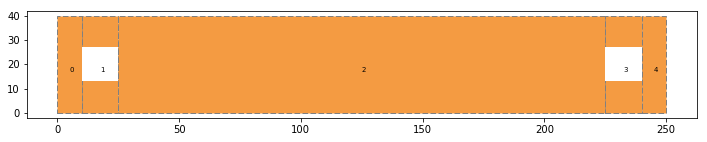

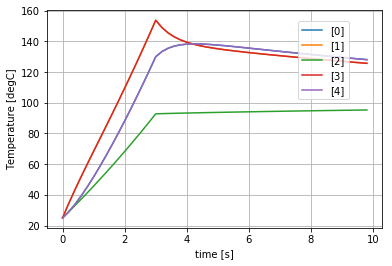

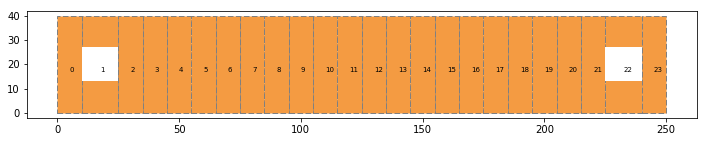

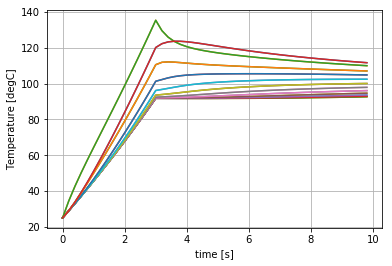

In [27]:
ResultsData02 = tml.mainAnalysis(analysisName='Second Study',\
                               geometryArray=copperBarGeometry,\
                               timeArray=time,\
                               currentArray=current,\
                               HTC=25, Emiss=0.2,\
                               ambientTemp=25, barStartTemperature=25,\
                               thermalConductivity=401, materialDensity=8920, materialCp=385)

tml.plotCurves(timeTable=time,\
               dataArray=ResultsData02,\
               plotName='HTC=25.e=0.2',xLabel='time [s]',yLabel='Temperature [degC]',\
               curvesLabelArray = False)
plt.show()

In [30]:
#poszukajmy maksimum naszej temperatury dla obydwu analiz
tempMax = [np.amax(ResultsData01),np.amax(ResultsData02)]
print(tempMax)

[153.73539455189285, 135.40452810963768]


<p> Warto zauważyć, że dokładniejsze odwzorowanie geometrii segmantami wpływa na wartość wyników. Mechanizm z którego to wynika jest dość oczywisty (chodzi o udział przewodnictwa pomiędzy segmentami w transporcie energii). Jednak na ile jest to zbliżanie się do rzeczywistości a na ile błąd?</p>
<p> daje do myśelenia choćiażby w odniesieniu do analiz FEM - bo to jest wprost analogia do wielkości elementów siatki.</p>


<h3>keep the cience in your heart!</h3>
<p>Tomek</p>
<div style='background-color: #aaaaaa; font-style: italic;'>#sciencematters</div>